# Dermatologist CNN 

## 1. Importing libs and dataset
+ Import file paths and labels
+ Convert path into images tensor as (x,y,3) array 
+ Normalize the tensor values(div by 255) and seperate the images and labels 

In [1]:
import keras
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image   
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True 
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
data_train = load_files('./data/trains/')
data_test = load_files('./data/trains')
data_valid = load_files('./data/trains')

In [18]:
def urls_to_images(records):
    to_image = lambda x: image.img_to_array(image.load_img(x,target_size=(32,32)))
    return [ to_image(x) for x in records ]

In [19]:
X_train = urls_to_images(data_train['filenames']) 
X_train = np.array( X_train , dtype='float') / 255
y_train = np_utils.to_categorical(data_train['target'])

X_test = urls_to_images(data_test['filenames'])
X_test = np.array( X_test , dtype='float') / 255
y_test = np_utils.to_categorical(data_test['target'])

X_valid = urls_to_images(data_valid['filenames'])
X_valid = np.array( X_valid , dtype='float') / 255
y_valid = np_utils.to_categorical(data_valid['target'])

## 2. Visualize the data

IndexError: index 16 is out of bounds for axis 0 with size 16

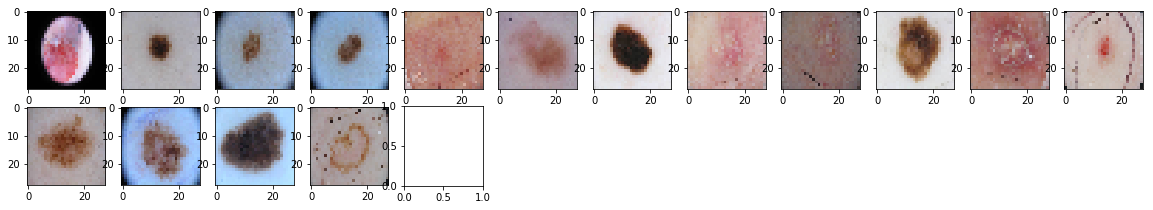

In [5]:
fig = plt.figure(figsize=(20,5))
for i in range(36): 
    ax = fig.add_subplot(3,12,1+i)
    ax.imshow(np.squeeze(X_train[i]))
_ = plt.show()

## 3. Create and Configure Augmented Image Generator

In [20]:
datagen_train =  ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, 
                                    horizontal_flip=True, shear_range=0.2, 
                                    zoom_range=0.2, fill_mode ='nearest' )
datagen_valid =  ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, 
                                    horizontal_flip=True, shear_range=0.2, 
                                    zoom_range=0.2, fill_mode ='nearest' )
datagen_train.fit(X_train)
datagen_valid.fit(X_valid)

## 4. Visualize Original and Augmented Images

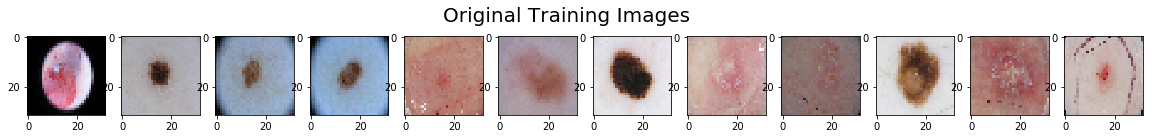

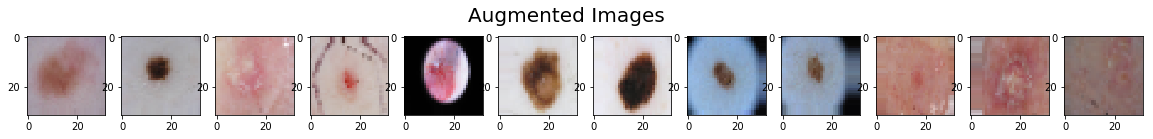

In [21]:
num_images_to_display = 12 

fig = plt.figure(figsize=(20,2))
for i in range(num_images_to_display): 
    ax = fig.add_subplot(1,num_images_to_display,1+i)
    ax.imshow(np.squeeze(X_train[i]))
fig.suptitle('Original Training Images', fontsize=20)
_ = plt.show()

x_train_subset =X_train[:num_images_to_display]
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=num_images_to_display):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

## 5.  Define the Model Architecture

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
__________

## 6. Compile the Model

In [24]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

## 7. Train the Model

In [33]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 2

checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=2, save_best_only=True)

model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=0, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(X_valid, y_valid, batch_size=batch_size),
                    validation_steps=X_valid.shape[0] // batch_size)

C:\Users\vaidicj\Anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks.py:432: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


## 8. Load the Model with the Best Validation Accuracy

In [15]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

OSError: Unable to open file (unable to open file: name = 'aug_model.weights.best.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## 9. Calculate Classification Accuracy on Test Set

In [16]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

ValueError: Error when checking input: expected conv2d_1_input to have shape (32, 32, 3) but got array with shape (28, 28, 3)

In [ ]:
import datetime
print("Last run on "+datetime.datetime.now().strftime("%d-%b-%Y %H:%M"))